<img src ='https://i.pinimg.com/originals/f7/0d/a5/f70da59711a903515d6aed0ee62b92cc.jpg' align = "center"><br><br>
# Análise de Dados: Vendas de Jogos de Videogame<br><br>
Este notebook apresenta alguns estudos a respeito de dados encontrados no dataset <a href="https://www.kaggle.com/datasets/gregorut/videogamesales">Video Game Sales</a> postado pelo usuário Gregory Smith no Kaggle, que contém informações relevantes a respeito de vendas de jogos de videogames durante determinado período.

# 1. Tratando os Dados

In [146]:
#Importando bibliotecas
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np, plotly.express as px
sns.set_palette("deep")
sns.set_style("darkgrid")

In [2]:
# Carregando o Dataset
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


#### Entendendo o dataset<br>
Podemos observar que o dataset é composto de 11 colunas e 16.598 linhas. Para compreender melhor a natureza dos dados contidos no dataset, devemos buscar entender melhor qual é o conteúdo de cada coluna. <br>
- **Rank**: Se trata da posição daquele determinado jogo no *ranking* de vendas;
- **Name**: Se trata do título do jogo;
- **Platform**: Se trata do console em que o jogo foi lançado;
- **Year**: Se refere ao ano de lançamento daquele título;
- **Genre**: Se trata do gênero daquele jogo;
- **Publisher**: Empresa responsável pela publicação do jogo;
- **NA_Sales**: Vendas na América do Norte, em milhões de dólares;
- **EU_Sales**: Vendas na Europa, em milhões de dólares;
- **JP_Sales**: Vendas no Japão, em milhões de dólares;
- **Other_Sales**: Vendas no em outras regiões além de Japão, Europa e América do Norte;
- **Global_Sales**: Total de vendas mundiais.

## 1.1 Traduzindo e renomeando dados<br>
Para fins de facilitar o entendimento ao público geral do conteúdo estudado neste projeto, iremos traduzir colunas e dados do Inglês para o Português brasileiro. Além disto, alguns dados também serão renomeados.<br>

In [3]:
# Traduzindo as colunas para PT-BR
df.columns = ['Posição de venda','Jogo','Console','Ano de Lançamento','Gênero','Publicadora',
             'Vendas América do Norte', 'Vendas Europa', 'Vendas Japão',
             'Vendas outras regiões', 'Vendas total']
# Visualizando dataframe
df.head()

,Posição de venda,Jogo,Console,Ano de Lançamento,Gênero,Publicadora,Vendas América do Norte,Vendas Europa,Vendas Japão,Vendas outras regiões,Vendas total
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# Observando os gêneros contidos no dataset
df.Gênero.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [5]:
# Usando o método replace() para realizar a tradução dos valores únicos de gênero
df.Gênero.replace({'Sports': 'Esporte','Platform' : 'Plataforma','Racing' : 'Corrida', 
                   'Role-Playing' : 'RPG','Puzzle' : 'Quebra-cabeça', 'Misc' : 'Diversos', 
                   'Shooter' : 'Tiro','Simulation' : 'Simulador', 'Action' : 'Ação', 
                   'Fighting' : 'Luta', 'Adventure' : 'Aventura',
                   'Strategy' : 'Estratégia'}, inplace = True)
# Verificando os novos valores traduzidos
df.Gênero.unique()

array(['Esporte', 'Plataforma', 'Corrida', 'RPG', 'Quebra-cabeça',
       'Diversos', 'Tiro', 'Simulador', 'Ação', 'Luta', 'Aventura',
       'Estratégia'], dtype=object)

In [6]:
# Observando os consoles contidos no Dataset
df.Console.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [7]:
# Usando o método replace() para renomear os consoles
df.Console.replace({'Wii' : 'Nintendo Wii', 'NES' : 'Nintendinho ', 'GB' : 'Game Boy',
                   'DS': 'Nintendo DS', 'X360' : 'Xbox 360', 'PS3': 'PlayStation 3',
                   'PS2' : 'PlayStation 2', 'SNES' : 'Super Nintendo', 'GBA' : 'Game Boy Advanced',
                   '3DS' :'Nitendo 3DS', 'PS4' : 'PlayStation 4', 'N64' : 'Nintendo 64',
                   'PS' : 'PlayStation', 'XB' : 'Xbox', '2600' : 'Atari 2600', 'XOne' : 'Xbox One',
                   'GC' : 'GameCube', 'WiiU' : 'Nintendo WiiU', 'GEN' : 'Sega Genesis', 
                   'DC' : 'Dreamcast', 'PSV' : 'PS Vita', 'SAT' : 'Sega Saturn', 
                   'SCD' : 'Sega CD', 'WS' : 'WonderSwan', 'NG' : 'Neo Geo', 
                   'TG16' : 'TurboGrafx-16', 'GG' : 'Game Gear', 'PCFX' : 'PC-FX'}, inplace = True)
# Verificando os novos valores traduzidos
df.Console.unique()

array(['Nintendo Wii', 'Nintendinho ', 'Game Boy', 'Nintendo DS',
       'Xbox 360', 'PlayStation 3', 'PlayStation 2', 'Super Nintendo',
       'Game Boy Advanced', 'Nitendo 3DS', 'PlayStation 4', 'Nintendo 64',
       'PlayStation', 'Xbox', 'PC', 'Atari 2600', 'PSP', 'Xbox One',
       'GameCube', 'Nintendo WiiU', 'Sega Genesis', 'Dreamcast',
       'PS Vita', 'Sega Saturn', 'Sega CD', 'WonderSwan', 'Neo Geo',
       'TurboGrafx-16', '3DO', 'Game Gear', 'PC-FX'], dtype=object)

## 1.2 Tratando dados nulos<br>
Alguns datasets podem conter dados sem registros, o que pode acabar prejudicando a eficácia de nossos estudos.<br>
Iremos ver se há dados faltantes em nosso dataset e os trataremos conforme for necessário de acordo com o tipo daquele dado.

In [8]:
# Verificando se há valores nulos no dataset
df.isnull().sum()

Posição de venda             0
Jogo                         0
Console                      0
Ano de Lançamento          271
Gênero                       0
Publicadora                 58
Vendas América do Norte      0
Vendas Europa                0
Vendas Japão                 0
Vendas outras regiões        0
Vendas total                 0
dtype: int64

As colunas **Ano de Lançamento** e **Publicadora** apresentam 271 e 58 valores sem registro, respectivamente.<br>
Como iremos fazer alguns estudos onde o ano de lançamento será uma informação relevante, iremos eliminar dados cujo ano não seja informado.<br>
As publicadoras sem registro, serão classificadas como desconhecidas.

In [9]:
# Removendo dados sem que não tenham o ano de lançamento informado
df.dropna(subset=['Ano de Lançamento'], inplace = True)
# Registrando como 'Desconhecida' publicadoras faltantes no dataset
df.Publicadora.fillna('Desconhecida', inplace = True)

In [10]:
# Verificando novamente se há valores nulos no dataset
df.isnull().sum()

Posição de venda           0
Jogo                       0
Console                    0
Ano de Lançamento          0
Gênero                     0
Publicadora                0
Vendas América do Norte    0
Vendas Europa              0
Vendas Japão               0
Vendas outras regiões      0
Vendas total               0
dtype: int64

**Perfeito!** Não há mais valores nulos no dataset

## 1.3 Verificando os tipos de dados<br>
Visando entender melhor como estão organizados os dados em nosso dataset, é necessário verificar os tipos de dados contidos em cada coluna do dataframe e, se necessários, realizar a mudança para outro tipo que seja mais relevante ao formato dos dados abordados.

In [11]:
# Verificando o tipo de dados contidos no dataset
df.dtypes

Posição de venda             int64
Jogo                        object
Console                     object
Ano de Lançamento          float64
Gênero                      object
Publicadora                 object
Vendas América do Norte    float64
Vendas Europa              float64
Vendas Japão               float64
Vendas outras regiões      float64
Vendas total               float64
dtype: object

O **Ano de Lançamento** está como *float*. Por se tratar de anos, ou seja, valores inteiros, iremos transformar os dados desta coluna em *int*.

In [12]:
# transformando Ano de Lançamento em Int
df['Ano de Lançamento'] = df['Ano de Lançamento'].astype(int)
# visualizando dataframe
df

,Posição de venda,Jogo,Console,Ano de Lançamento,Gênero,Publicadora,Vendas América do Norte,Vendas Europa,Vendas Japão,Vendas outras regiões,Vendas total
0,1,Wii Sports,Nintendo Wii,2006,Esporte,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,Nintendinho,1985,Plataforma,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Nintendo Wii,2008,Corrida,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Nintendo Wii,2009,Esporte,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,Game Boy,1996,RPG,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,Game Boy Advanced,2002,Plataforma,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GameCube,2003,Tiro,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PlayStation 2,2008,Corrida,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,Nintendo DS,2010,Quebra-cabeça,7G//AMES,0.00,0.01,0.00,0.00,0.01


Podemos observar que os anos não apresentam mais valores decimais!

## 1.4 Verificando o período abordado pelo dataset<br>
Como o dataset apresenta um estudo de vendas de jogos de videogames em uma linha temporal, é importante observar quais são os anos contidos no dataset, para que saibamos o período abordado durante o estudo.

In [13]:
# Vendo a quantidade de lançamentos por ano
df['Ano de Lançamento'].value_counts()

2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
2006    1008
2005     941
2002     829
2003     775
2004     763
2012     657
2015     614
2014     582
2013     546
2001     482
1998     379
2000     349
2016     344
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: Ano de Lançamento, dtype: int64

Podemos observar que o dataset apresenta lançamentos de 1980 até 2020.<br>
Como os anos de 2020 e 2017 apresentam dados faltantes e os anos de 2018 e 2019 não aparecem na lista, iremos concluir que todos os lançamentos pós-2016 apresentam dados faltantes. Iremos, portanto, remover estes lançamentos de nosso dataset.

In [14]:
# Eliminando todos os dados cujo ano de lançamento seja maior ou igual a 2017
df_anos_drop = df[df['Ano de Lançamento'] >= 2017].index
df = df.drop(df_anos_drop)
# Visualizando os anos contidos no dataset
df['Ano de Lançamento'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2003, 1986, 2000, 1995, 2016, 1991,
       1981, 1987, 1980, 1983])

#### Período Estudado<br>
Agora, portanto, já sabemos que este estudo aborda **vendas de jogos de videogame entre os anos de 1980 e 2016**.

## 1.5 Ranking de vendas<br>
Como podemos observar, o dataset já vem organizado por um ranking de vendas de acordo com o número de vendas total, conforme podemos observar abaixo:

In [15]:
df.head(10)

,Posição de venda,Jogo,Console,Ano de Lançamento,Gênero,Publicadora,Vendas América do Norte,Vendas Europa,Vendas Japão,Vendas outras regiões,Vendas total
0,1,Wii Sports,Nintendo Wii,2006,Esporte,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,Nintendinho,1985,Plataforma,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Nintendo Wii,2008,Corrida,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Nintendo Wii,2009,Esporte,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,Game Boy,1996,RPG,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,Game Boy,1989,Quebra-cabeça,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,Nintendo DS,2006,Plataforma,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Nintendo Wii,2006,Diversos,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Nintendo Wii,2009,Plataforma,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,Nintendinho,1984,Tiro,Nintendo,26.93,0.63,0.28,0.47,28.31


Entretanto, seria <font color = 'red'><b> incorreto </font> considerar este ranking, já que ele não contabiliza as vendas totais de jogos multiplataformas, ou seja, lançados para diversos consoles, e sim, contabiliza apenas as vendas individuais em cada console.<br>
Vamos observar os jogos multiplataformas contidos no dataset.

In [16]:
# Observando os jogos lançados para mais plataformas
df.groupby('Jogo',as_index = False)['Console'].count().sort_values(
    'Console', ascending = False).head(10)

,Jogo,Console
6596,Need for Speed: Most Wanted,12
7653,Ratatouille,9
5045,LEGO Marvel Super Heroes,9
2885,FIFA 14,9
5366,Madden NFL 07,8
9819,The LEGO Movie Videogame,8
5111,Lego Batman 3: Beyond Gotham,8
5058,LEGO The Hobbit,8
5042,LEGO Jurassic World,8
2886,FIFA 15,8


O jogo **Need for Speed: Most Wanted** foi o jogo cujo lançamento mais se distribuiu por plataformas, totalizando 12 consoles lançados.<br>
Vamos observar as vendas deste jogo em cada console.

In [17]:
df.query("Jogo == 'Need for Speed: Most Wanted'").sort_values('Vendas total', ascending = True)

,Posição de venda,Jogo,Console,Ano de Lançamento,Gênero,Publicadora,Vendas América do Norte,Vendas Europa,Vendas Japão,Vendas outras regiões,Vendas total
11676,11678,Need for Speed: Most Wanted,PC,2012,Corrida,Electronic Arts,0.00,0.06,0.00,0.02,0.08
6492,6494,Need for Speed: Most Wanted,Game Boy Advanced,2005,Corrida,Electronic Arts,0.19,0.07,0.00,0.00,0.26
6278,6280,Need for Speed: Most Wanted,Nintendo DS,2005,Corrida,Electronic Arts,0.24,0.01,0.00,0.02,0.27
6149,6151,Need for Speed: Most Wanted,Nintendo WiiU,2013,Corrida,Electronic Arts,0.14,0.12,0.00,0.02,0.28
5900,5902,Need for Speed: Most Wanted,PC,2005,Corrida,Electronic Arts,0.02,0.23,0.00,0.05,0.30
3585,3587,Need for Speed: Most Wanted,GameCube,2005,Corrida,Electronic Arts,0.43,0.11,0.00,0.02,0.56
2005,2007,Need for Speed: Most Wanted,Xbox,2005,Corrida,Electronic Arts,0.53,0.46,0.00,0.05,1.04
1742,1744,Need for Speed: Most Wanted,PS Vita,2012,Corrida,Electronic Arts,0.38,0.52,0.01,0.25,1.16
1530,1532,Need for Speed: Most Wanted,Xbox 360,2005,Corrida,Electronic Arts,1.00,0.17,0.02,0.10,1.29
1173,1175,Need for Speed: Most Wanted,Xbox 360,2012,Corrida,Electronic Arts,0.62,0.80,0.01,0.15,1.58


Portanto, para contabilizarmos as vendas totais de **Need for Speed: Most Wanted** e posicioná-lo no ranking, devemos fazer um somatório de vendas totais em cada console e o mesmo deve ser feito com todos os outros jogos multiplataforma para que, assim, tenhamos um verdadeiro ranking de vendas total de jogos entre 1980 e 2016.

In [18]:
# Agrupando jogos pela soma de vendas total e organizando um ranking dos 10 mais vendidos
df.groupby('Jogo',as_index=False)['Vendas total'].sum().sort_values(
    'Vendas total',ascending = False).head(10)

,Jogo,Vendas total
10880,Wii Sports,82.74
3663,Grand Theft Auto V,55.92
9226,Super Mario Bros.,45.31
9608,Tetris,35.84
5506,Mario Kart Wii,35.82
10882,Wii Sports Resort,33.00
7263,Pokemon Red/Pokemon Blue,31.37
1211,Call of Duty: Modern Warfare 3,30.83
6646,New Super Mario Bros.,30.01
1207,Call of Duty: Black Ops II,29.72


## Ranking de Vendas<br>
Portanto, os **dez jogos mais vendidos entre 1980 e 2016** são: 
> - 1º - Wii Sports / 82.74 milhões de cópias vendidas<br><br>
> - 2º - Grand Theft Auto V / 55.92 milhões de cópias vendidas<br><br>
> - 3º - Super Mario Bros. / 45.31 milhões de cópias vendidas<br><br>
> - 4º - Tetris / 35.84 milhões de cópias vendidas<br><br>
> - 5º - Mario Kart Wii	 / 35.82 milhões de cópias vendidas<br><br>
> - 6º - Wii Sports Resort / 33.00 milhões de cópias vendidas<br><br>
> - 7º - Pokemon Red/Pokemon Blu / 31.37 milhões de cópias vendidas<br><br>
> - 8º - Call of Duty: Modern Warfare 3 / 30.83 milhões de cópias vendidas<br><br>
> - 9º - New Super Mario Bros. / 30.01 milhões de cópias vendidas<br><br>
> - 10º - Call of Duty: Black Ops II / 29.72 milhões de cópias vendidas

# 2. Visualizando os Dados<br>
Após todo o tratamento dos dados realizado acima, podemos enfim visualizar como os dados se comportam em nosso dataset para extrairmos informações a respeito do período estudado.

# 2.1 Jogos

### 10 Jogos mais vendidos

In [19]:
# Visualizando um DataFrame com o Ranking dos dez jogos mais vendidos 
top_10 = pd.DataFrame(df.groupby('Jogo')[['Jogo','Vendas total']].sum().sort_values(
    'Vendas total',ascending = False).head(10))
top_10

,Vendas total
Jogo,
Wii Sports,82.74
Grand Theft Auto V,55.92
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.82
Wii Sports Resort,33.00
Pokemon Red/Pokemon Blue,31.37
Call of Duty: Modern Warfare 3,30.83
New Super Mario Bros.,30.01


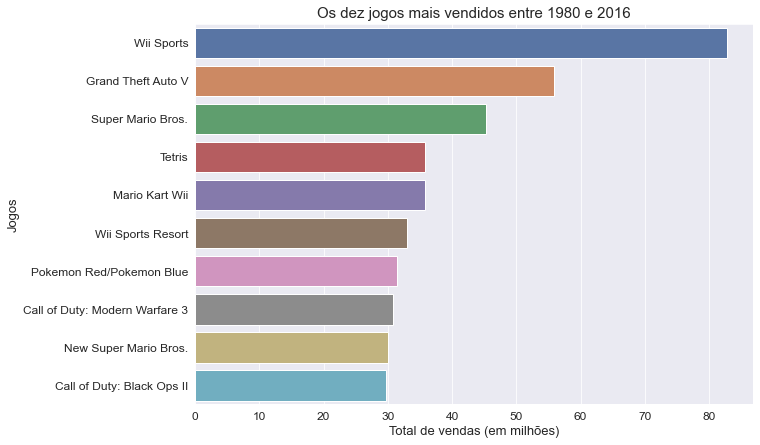

In [76]:
# Plotando um gráfico de barras horizontal com os dez jogos mais vendidos
plt.figure(figsize=(10,7))
sns.barplot(x = 'Vendas total', y = top_10.index, data = top_10 )
plt.ylabel('Jogos', size = 13)
plt.xlabel('Total de vendas (em milhões)', size = 13)
plt.title('Os dez jogos mais vendidos entre 1980 e 2016', size = 15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

### Os jogos lançados para mais plataformas

In [31]:
# Visualizando dataframe dos jogos lançados para mais plataformas
multiplatforms = pd.DataFrame(df.groupby('Jogo',as_index = False)['Console'].count().sort_values(
    'Console', ascending = False).head(10))
multiplatforms

,Jogo,Console
6596,Need for Speed: Most Wanted,12
7653,Ratatouille,9
5045,LEGO Marvel Super Heroes,9
2885,FIFA 14,9
5366,Madden NFL 07,8
9819,The LEGO Movie Videogame,8
5111,Lego Batman 3: Beyond Gotham,8
5058,LEGO The Hobbit,8
5042,LEGO Jurassic World,8
2886,FIFA 15,8


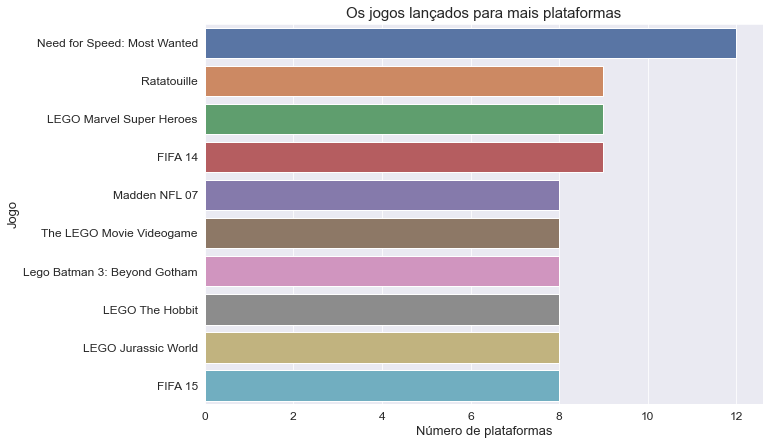

In [75]:
plt.figure(figsize=(10,7))
sns.barplot(x = 'Console', y = 'Jogo', data = multiplatforms)
plt.ylabel('Jogo', size = 13)
plt.xlabel('Número de plataformas', size = 13)
plt.title('Os jogos lançados para mais plataformas', size = 15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

# 2.2 Consoles

### Os consoles com mais lançamentos

In [86]:
# Criando dataframe mostrando os consoles que mais tiveram lançamentos
most_releases = pd.DataFrame(df.Console.value_counts().rename_axis('Consoles').reset_index(
    name='Lançamentos').head(10))
most_releases

,Consoles,Lançamentos
0,Nintendo DS,2132
1,PlayStation 2,2127
2,PlayStation 3,1304
3,Nintendo Wii,1290
4,Xbox 360,1235
5,PSP,1197
6,PlayStation,1189
7,PC,943
8,Game Boy Advanced,811
9,Xbox,803


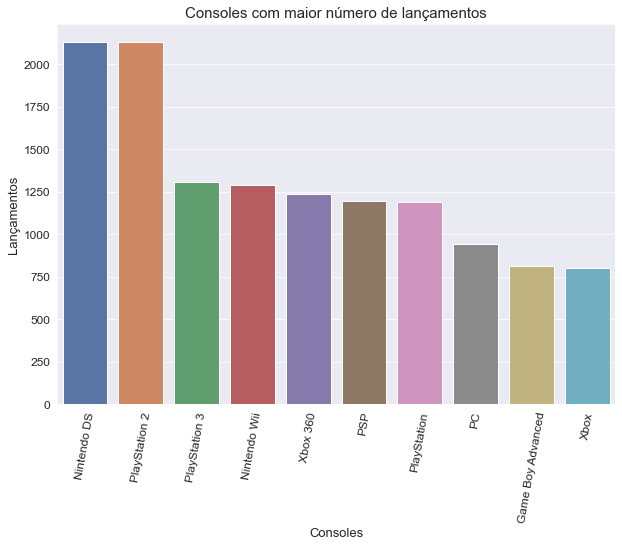

In [88]:
plt.figure(figsize=(10,7))
sns.barplot(x = 'Consoles', y = 'Lançamentos', data = most_releases)
plt.ylabel('Lançamentos', size = 13)
plt.xlabel('Consoles', size = 13)
plt.title('Consoles com maior número de lançamentos', size = 15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=80)
plt.show()

### Os consoles com o maior número de vendas

In [90]:
# Criando dataframe mostrando os consoles que mais venderam jogos
most_sales = pd.DataFrame(df.groupby('Console')[['Vendas total']].sum().sort_values('Vendas total', 
                                                          ascending = False).head(10))
most_sales

,Vendas total
Console,
PlayStation 2,1233.46
Xbox 360,969.61
PlayStation 3,949.35
Nintendo Wii,909.81
Nintendo DS,818.67
PlayStation,727.39
Game Boy Advanced,313.56
PSP,291.71
PlayStation 4,278.07


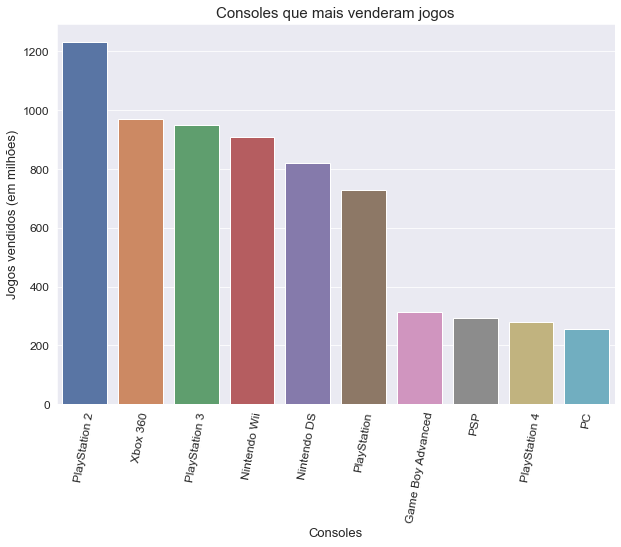

In [94]:
plt.figure(figsize=(10,7))
sns.barplot(x = most_sales.index, y = 'Vendas total', data = most_sales)
plt.ylabel('Jogos vendidos (em milhões)', size = 13)
plt.xlabel('Consoles', size = 13)
plt.title('Consoles que mais venderam jogos', size = 15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=80)
plt.show()

#### PlayStation 2 <br>
Observando os gráficos de consoles ordenados pelo número de jogos lançados e também pelo número de jogos vendidos, é fácil perceber como o PlayStation 2, console lançado pela Sony em 4 de março de 2000, se destaca.<br>
O PlayStation 2 é <a href="https://en.wikipedia.org/wiki/List_of_best-selling_game_consoles">o console mais vendido da história</a>!<br>
Devido a sua alta popularidade e importância à indústria dos *games*, podemos fazer um estudo específico visando observar quais jogos e gêneros foram populares na geração de consoles de 128 bits, cujo o PlayStation 2 se destacou como grande vencedor de vendas. 

### Os jogos mais vendidos do PlayStation 2

In [105]:
ps2_games = pd.DataFrame(df.query(
    "Console == 'PlayStation 2'")[['Jogo','Vendas total']].set_index('Jogo').sort_values(
    'Vendas total',ascending = False).head(10))
ps2_games

,Vendas total
Jogo,
Grand Theft Auto: San Andreas,20.81
Grand Theft Auto: Vice City,16.15
Gran Turismo 3: A-Spec,14.98
Grand Theft Auto III,13.10
Gran Turismo 4,11.66
Final Fantasy X,8.05
Need for Speed Underground,7.20
Need for Speed Underground 2,6.90
Medal of Honor: Frontline,6.83


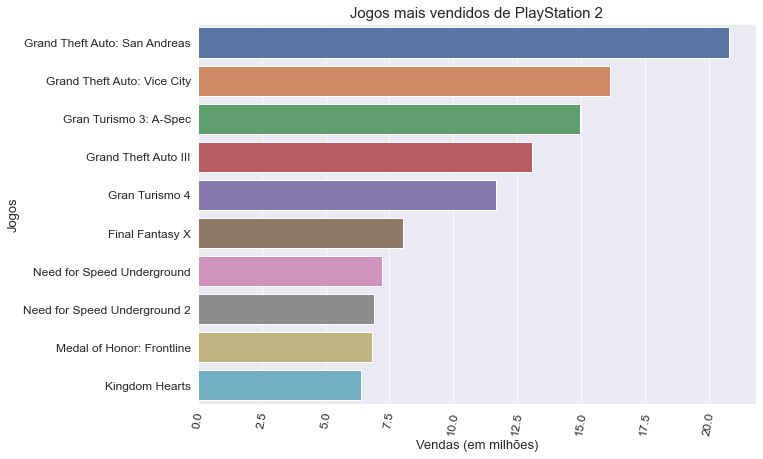

In [109]:
plt.figure(figsize=(10,7))
sns.barplot(x ='Vendas total', y =ps2_games.index, data = ps2_games)
plt.ylabel('Jogos', size = 13)
plt.xlabel('Vendas (em milhões)', size = 13)
plt.title('Jogos mais vendidos de PlayStation 2', size = 15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=80)
plt.show()

### Os gêneros mais populares de PlayStation 2

In [152]:
# Criando um DataFrame que organize os gêneros mais vendidos de PlayStation 2
popular_genres_ps2 = pd.DataFrame(df.query("Console == 'PlayStation 2'")[['Gênero','Vendas total']].groupby(
    'Gênero')['Vendas total'].sum().sort_values(ascending = False))
popular_genres_ps2

,Vendas total
Gênero,
Ação,272.43
Esporte,262.64
Corrida,154.21
Tiro,108.28
Diversos,98.69
RPG,91.55
Luta,89.19
Plataforma,72.11
Simulador,42.26


In [206]:
# Visualizando os gêneros mais vendidos de PlayStation 2
plt.figure(figsize=(8,2))
fig = px.pie(df.query("Console == 'PlayStation 2'")[['Gênero','Vendas total']].groupby(
    'Gênero')['Vendas total'].sum().sort_values(ascending = False), names = popular_genres_ps2.index,
      values = 'Vendas total', template = 'seaborn', title = 'Gêneros mais vendidos no PlayStation 2')
fig.update_traces(rotation=90, pull = [0.2,0.06,0.06,0.06,0.06], textinfo = "percent+label")
fig.show()

<Figure size 576x144 with 0 Axes>

### Publicadoras que mais venderam no PlayStation 2

In [166]:
# Mostrando vendas do PlayStation 2 por publicadora em um dataframe
publishers_ps2 = pd.DataFrame(df.query("Console == 'PlayStation 2'")[['Publicadora','Vendas total']].groupby(
    'Publicadora')['Vendas total'].sum().sort_values(ascending = False).head(10))
publishers_ps2

,Vendas total
Publicadora,
Electronic Arts,245.96
Sony Computer Entertainment,172.80
Take-Two Interactive,90.61
Activision,85.59
Konami Digital Entertainment,81.86
THQ,75.37
Namco Bandai Games,49.66
Atari,41.82
Capcom,34.01


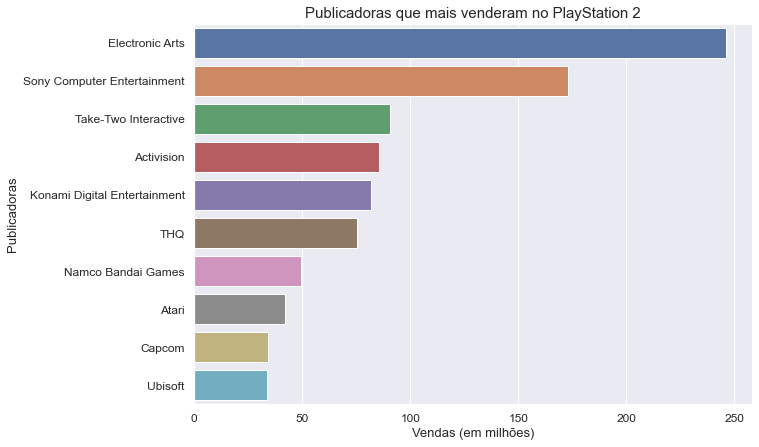

In [169]:
# Visualizando as publicadoras que mais venderam no PlayStation 2
plt.figure(figsize=(10,7))
sns.barplot(x ='Vendas total', y =publishers_ps2.index, data = publishers_ps2)
plt.ylabel('Publicadoras', size = 13)
plt.xlabel('Vendas (em milhões)', size = 13)
plt.title('Publicadoras que mais venderam no PlayStation 2', size = 15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

#### Resumo PlayStation 2<br>
Dentre os jogos mais vendidos do console, os gêneros de ação, esporte e corrida se destacam, corroborando com o ranking dos *games* mais vendidos do console, já que tanto os *Grand Theft Autos* quanto os *Gran Turismos* presentes no Top 5 são jogos de ação e corrida, respectivamente.<br>
Dentre as publicadoras que mais venderam, a Electronic Arts se destaca, sendo uma publicadora bastante versátil, porém reconhecidamente famosa por jogos de esporte - segundo gênero que mais vendeu no PlayStation 2 - com as franquias FIFA, Madden NFL, NBA Live, dentre outras. Além disto, a Electronic Arts também foi responsável pela publicação dos jogos *Need for Speed Underground* e *Need for Speed Underground 2*, também presentes no Top 10 dos jogos mais vendidos para este console.

# 2.3 Ano de Lançamento

### Frequência anual de lançamentos

In [186]:
# Organizando os anos por lançamentos
df['Ano de Lançamento'].value_counts().head(10)

2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
2006    1008
2005     941
2002     829
2003     775
2004     763
Name: Ano de Lançamento, dtype: int64

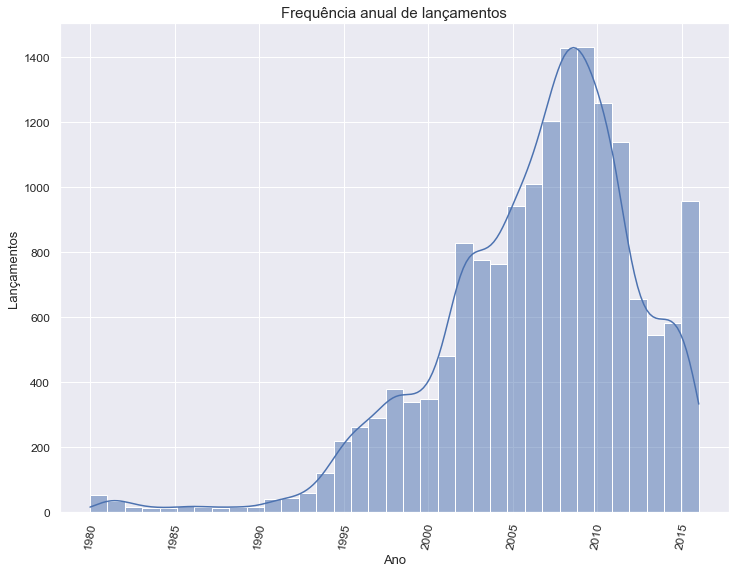

In [188]:
# Visualizando histograma de lançamentos por ano
sns.histplot(data = df, x = "Ano de Lançamento", bins=35, kde=True)
plt.ylabel('Lançamentos', size = 13)
plt.xlabel('Ano', size = 13)
plt.title('Frequência anual de lançamentos', size = 15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=80)
plt.show()

### Número de vendas a cada ano

In [189]:
# Anos com maiores números de vendas
df.groupby('Ano de Lançamento')[['Vendas total']].sum().sort_values('Vendas total',
                                                                   ascending = False).head(10)

,Vendas total
Ano de Lançamento,
2008,678.90
2009,667.30
2007,611.13
2010,600.45
2006,521.04
2011,515.99
2005,459.94
2004,419.31
2002,395.52


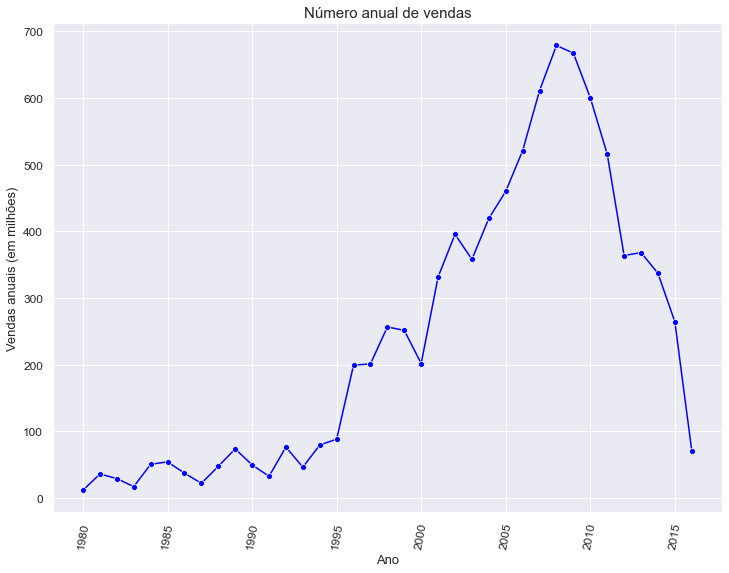

In [194]:
#Visualizando as vendas anuais
sns.lineplot(data = df.groupby('Ano de Lançamento')[['Vendas total']].sum(),
            x = 'Ano de Lançamento', y = 'Vendas total', color = 'blue', marker = 'o')
plt.ylabel('Vendas anuais (em milhões)', size = 13)
plt.xlabel('Ano', size = 13)
plt.title('Número anual de vendas', size = 15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=80)
plt.show()

#### Crescimento da indústria entre as décadas de 1980 e 2010<br>
Os gráficos de frequência de lançamentos e vendas anuais indicam que houve uma forte aceleração no crescimento da indústria de videogames a partir da segunda metade dos anos 1990, atingindo seu ápice no final dos anos 2000, particularmente no ano de 2008, vendendo 678.90 milhões de jogos em todo o mundo.<br>
Durante a década de 2010, a indústria apresentou um desaceleramento na vendas, coincidentemente no mesmo período em que os *smartphones* se tornaram mais acessíveis e surgiu uma nova indústria de jogos mobile.

# 2.4 Gênero

### Gêneros mais vendidos

In [196]:
# Organizando os gêneros pelo número total de vendas
genres = pd.DataFrame(df.groupby('Gênero')['Vendas total'].sum().sort_values(ascending = False))
genres

,Vendas total
Gênero,
Ação,1722.87
Esporte,1309.24
Tiro,1026.20
RPG,923.80
Plataforma,829.15
Diversos,797.62
Corrida,726.77
Luta,444.05
Simulador,389.87


In [228]:
# Visualizando o funil de vendas por gênero
fig = px.funnel(genres, y = genres.index, x = 'Vendas total')
fig.update_layout(
    title={
        'text': "Funil de vendas por gênero (em milhões)",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

### Gêneros por plataforma

In [229]:
# Criando um dataframe para visualizar o número de jogos lançados para cada console em cada gênero
genre_platform = pd.crosstab(df['Console'], df['Gênero'])
# Criando uma coluna que calcule o total de jogos port plataforma de acordo com o gênero
genre_platform['Total'] = genre_platform.sum(axis=1)
# Visualizando o dataframe
genre_platform.head()

Gênero,Aventura,Ação,Corrida,Diversos,Esporte,Estratégia,Luta,Plataforma,Quebra-cabeça,RPG,Simulador,Tiro,Total
Console,,,,,,,,,,,,,
3DO,1,0,0,0,0,0,0,0,1,0,1,0,3
Atari 2600,1,55,4,5,10,0,1,9,8,0,1,22,116
Dreamcast,11,3,6,0,10,0,12,2,0,4,1,3,52
Game Boy,5,6,2,8,9,7,0,18,15,21,5,1,97
Game Boy Advanced,37,162,64,110,88,18,23,139,39,73,18,40,811


C:\Users\luuisotorres\AppData\Local\Temp\ipykernel_13120\3790639699.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



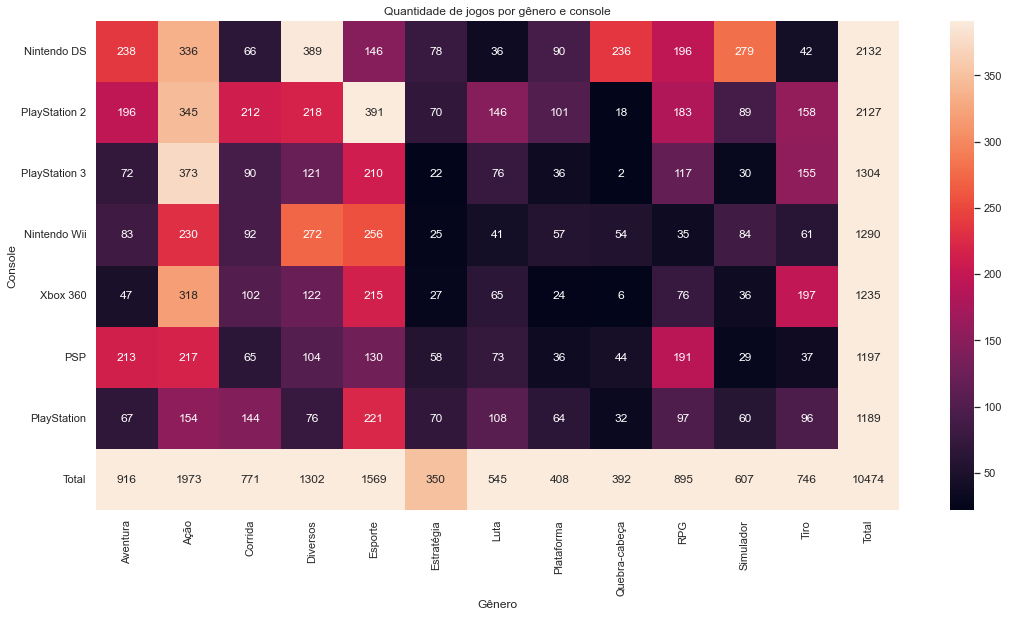

In [231]:
# Usando o dataframe acima para criar um heatmap
top10_platforms = genre_platform[genre_platform['Total'] > 1000].sort_values('Total', 
                                                                             ascending = False)
top10 = top10_platforms.append(pd.DataFrame(top10_platforms.sum(), columns =['Total']).T,
                              ignore_index=False)

sns.set(font_scale = 1)
plt.figure(figsize=(18,9))
sns.heatmap(top10, annot = True, vmax=top10.loc[:'PlayStation',:'Estratégia'].values.max(),
           vmin = top10.loc[:,:'Estratégia'].values.min(),fmt='d')
plt.xlabel('Gênero')
plt.ylabel('Console')
plt.title('Quantidade de jogos por gênero e console')
plt.show()

#### Gêneros mais populares<br>
Através do funil de vendas totais, é possível perceber que os gêneros mais rentáveis entre 1980 e 2016 foram os de **ação**, **esporte**,**tiro**,**rpg** e **plataforma**.<br>
O heatmap acima permite observar o número de lançamentos de cada gênero por console. É possível ver, por exemplo, que a maioria dos jogos lançados para o PlayStation 2 podem ser classificados como jogos de esporte, ação, diveros e corrida. Por outro lado, é possível perceber que jogos do gênero simulador foram lançados mais para o Nintendo DS do que para qualquer outro console analisado no período.

# 2.4 Publicadoras

### Publicadoras que mais lançaram jogos

In [235]:
# Organizando as publicadoras por número de lançamento
most_releases_by_publisher = df.Publicadora.value_counts().rename_axis('Publicadora').reset_index(
    name='Lançamentos').head(10)
most_releases_by_publisher

,Publicadora,Lançamentos
0,Electronic Arts,1339
1,Activision,966
2,Namco Bandai Games,928
3,Ubisoft,917
4,Konami Digital Entertainment,823
5,THQ,712
6,Nintendo,696
7,Sony Computer Entertainment,682
8,Sega,630
9,Take-Two Interactive,412


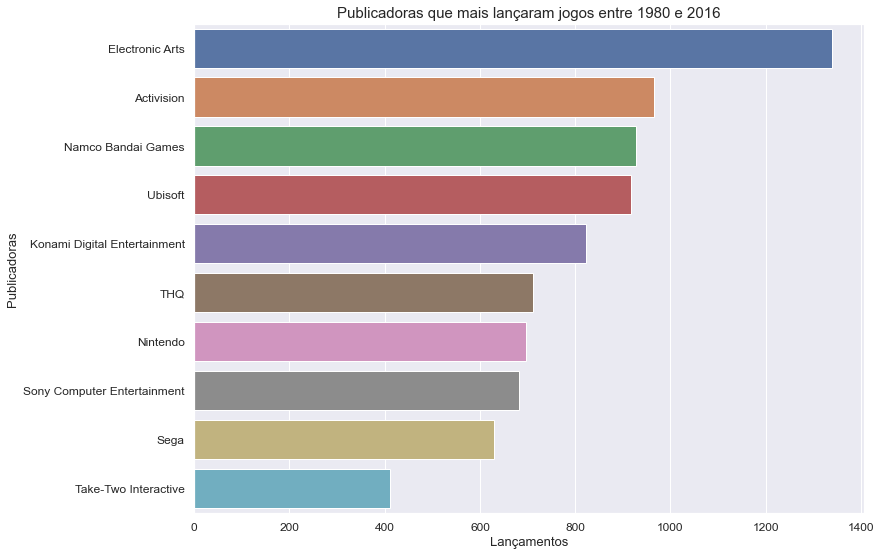

In [241]:
# Visualizando o número de lançamentos por publicadora
sns.barplot(x ='Lançamentos', y ='Publicadora', data = most_releases_by_publisher)
plt.ylabel('Publicadoras', size = 13)
plt.xlabel('Lançamentos', size = 13)
plt.title('Publicadoras que mais lançaram jogos entre 1980 e 2016', size = 15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

### Publicadoras que mais venderam jogos

In [250]:
# Criando dataframe que organize as publicadoras pelo número de vendas
most_selling_publishers = pd.DataFrame(df.groupby(
    'Publicadora')['Vendas total'].sum().sort_values(ascending=False).head(10))
most_selling_publishers

,Vendas total
Publicadora,
Nintendo,1784.43
Electronic Arts,1093.39
Activision,721.41
Sony Computer Entertainment,607.28
Ubisoft,473.25
Take-Two Interactive,399.30
THQ,340.44
Konami Digital Entertainment,278.56
Sega,270.66


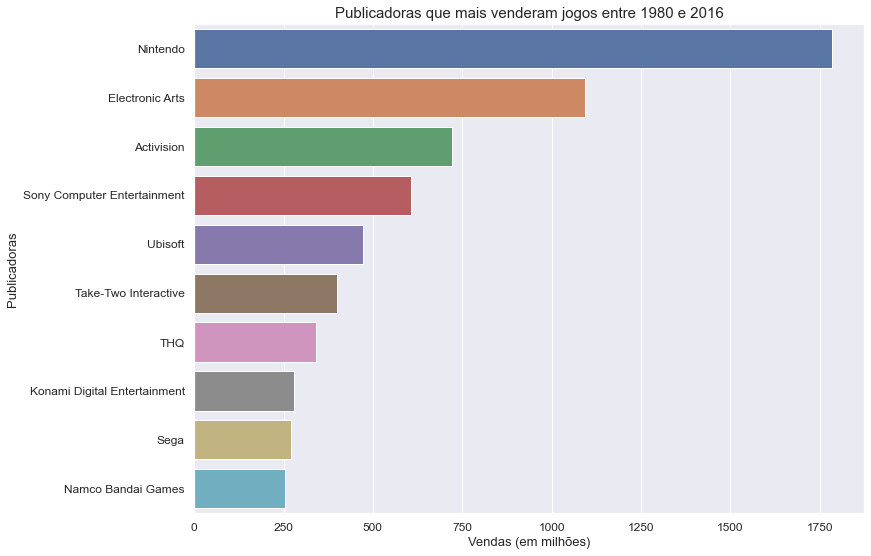

In [252]:
# Visualizando as publicadores que mais venderam
sns.barplot(x ='Vendas total', y =most_selling_publishers.index, data = most_selling_publishers)
plt.ylabel('Publicadoras', size = 13)
plt.xlabel('Vendas (em milhões)', size = 13)
plt.title('Publicadoras que mais venderam jogos entre 1980 e 2016', size = 15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

#### Publicadoras<br>
A publicadora mais rentável do período foi a Nintendo, o que não é de se espantar, já que ela publicou 7 dos 10 jogos mais vendidos do período, inclusive *Tetris*, até cerca de 1996, quando os direitos do jogo foram revertidos ao co-fundador da Tetris Company, Alexey Pajitnov.<br>
A Electronic Arts, publicadora de grandes franquias de jogos de esporte, corrida e outros, foi a segunda publicadora mais rentável e, também, a que mais lançou jogos durante o período.<br>
A Activision, que também foi destaque nos lançamentos e é publicadora de jogos como *Call of Duty: Modern Warfare 3* e *Call of Duty: Black Ops II*, ambos presentes no Top 10 de jogos mais vendidos, foi a terceira publicadora mais rentável entre os anos de 1980 e 2016.

# 2.5 Regiões

### Total de vendas anuais por região

In [269]:
# Organizando o total de vendas anuais por região
region_yearly_sales = pd.DataFrame(df.groupby('Ano de Lançamento')[['Vendas América do Norte',
                                'Vendas Europa',
                                'Vendas Japão',
                                'Vendas outras regiões']].sum())
region_yearly_sales

,Vendas América do Norte,Vendas Europa,Vendas Japão,Vendas outras regiões
Ano de Lançamento,,,,
1980,10.59,0.67,0.00,0.12
1981,33.40,1.96,0.00,0.32
1982,26.92,1.65,0.00,0.31
1983,7.76,0.80,8.10,0.14
1984,33.28,2.10,14.27,0.70
1985,33.73,4.74,14.56,0.92
1986,12.50,2.84,19.81,1.93
1987,8.46,1.41,11.63,0.20
1988,23.87,6.59,15.76,0.99


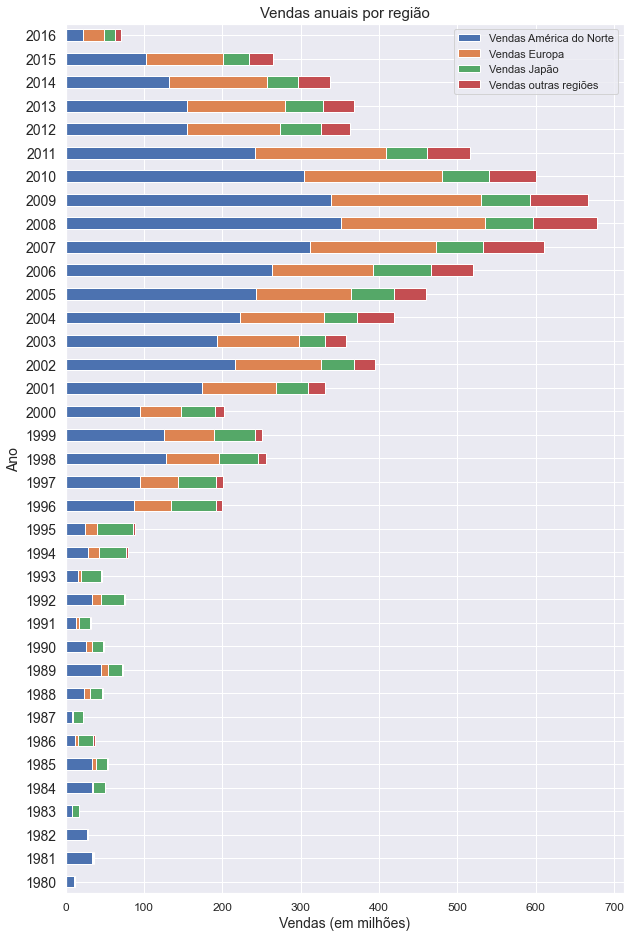

In [299]:
# Visualizando o total de vendas anuais por região
region_yearly_sales.plot(kind = 'barh', stacked =True, legend = 10)
plt.gcf().set_size_inches(10,16)
plt.ylabel('Ano', size = 14)
plt.xlabel('Vendas (em milhões)', size = 14)
plt.title('Vendas anuais por região', size = 15)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.show()

### Os cinco consoles mais populares por região

In [323]:
# Criando dataframes que contabilizam os 5 consoles mais populares pelo número de vendas por região
platforms_na = df.groupby('Console',as_index=True)[['Vendas América do Norte']].sum().sort_values(
    'Vendas América do Norte', ascending = False).head(5)
platforms_eu = df.groupby('Console',as_index=True)[['Vendas Europa']].sum().sort_values(
    'Vendas Europa', ascending = False).head(5)
platforms_jp = df.groupby('Console',as_index=True)[['Vendas Japão']].sum().sort_values(
    'Vendas Japão', ascending = False).head(5)
platforms_other = df.groupby('Console',as_index=True)[['Vendas outras regiões']].sum().sort_values(
    'Vendas outras regiões', ascending = False).head(5)

#### Consoles mais populares na América do Norte

In [324]:
plt.figure(figsize=(8,2))
fig = px.pie(platforms_na, names = platforms_na.index,
      values = 'Vendas América do Norte', template = 'seaborn', title = 
             'Consoles mais populares na América do Norte')
fig.update_traces(rotation=90, pull = [0.2,0.06,0.06,0.06,0.06], textinfo = "percent+label")
fig.show()

<Figure size 576x144 with 0 Axes>

#### Consoles mais populares na Europa

In [325]:
plt.figure(figsize=(8,2))
fig = px.pie(platforms_eu, names = platforms_eu.index,
      values = 'Vendas Europa', template = 'seaborn', title = 
             'Consoles mais populares na Europa')
fig.update_traces(rotation=90, pull = [0.2,0.06,0.06,0.06,0.06], textinfo = "percent+label")
fig.show()

<Figure size 576x144 with 0 Axes>

#### Consoles mais populares no Japão

In [326]:
plt.figure(figsize=(8,2))
fig = px.pie(platforms_jp, names = platforms_jp.index,
      values = 'Vendas Japão', template = 'seaborn', title = 
             'Consoles mais populares no Japão')
fig.update_traces(rotation=90, pull = [0.2,0.06,0.06,0.06,0.06], textinfo = "percent+label")
fig.show()

<Figure size 576x144 with 0 Axes>

#### Consoles mais populares em outras regiões

In [328]:
plt.figure(figsize=(8,2))
fig = px.pie(platforms_other, names = platforms_other.index,
      values = 'Vendas outras regiões', template = 'seaborn', title = 
             'Consoles mais populares em outras regiões')
fig.update_traces(rotation=90, pull = [0.2,0.06,0.06,0.06,0.06], textinfo = "percent+label")
fig.show()

<Figure size 576x144 with 0 Axes>

### Gêneros mais vendidos por região

In [309]:
# Criando Dataframes que totalizam o total de vendas por gênero para cada região
genres_na = pd.DataFrame(df.groupby('Gênero')['Vendas América do Norte'].sum().sort_values(ascending = False))
genre_eu =pd.DataFrame(df.groupby('Gênero')['Vendas Europa'].sum().sort_values(ascending = False))
genre_jp =pd.DataFrame(df.groupby('Gênero')['Vendas Japão'].sum().sort_values(ascending = False))
genre_other =pd.DataFrame(df.groupby('Gênero')['Vendas outras regiões'].sum().sort_values(ascending = False))

#### Gêneros mais vendidos na América do Norte

In [306]:
# Visualizando o funil de vendas na América do Norte por gênero
fig = px.funnel(genres_na, y = genres_na.index, x = 'Vendas América do Norte')
fig.update_layout(
    title={
        'text': "Funil de vendas por gênero (em milhões) na América do Norte",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

#### Gêneros mais vendidos na Europa

In [312]:
# Visualizando o funil de vendas na Europa por gênero
fig = px.funnel(genre_eu, y = genre_eu.index, x = 'Vendas Europa')
fig.update_layout(
    title={
        'text': "Funil de vendas por gênero (em milhões) na Europa",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

#### Gêneros mais vendidos no Japão

In [310]:
# Visualizando o funil de vendas no Japão por gênero
fig = px.funnel(genre_jp, y = genre_jp.index, x = 'Vendas Japão')
fig.update_layout(
    title={
        'text': "Funil de vendas por gênero (em milhões) no Japão",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

#### Gêneros mais vendidos em outras regiões

In [314]:
# Visualizando o funil de vendas em outras regiões por gênero
fig = px.funnel(genre_other, y = genre_other.index, x = 'Vendas outras regiões')
fig.update_layout(
    title={
        'text': "Funil de vendas por gênero (em milhões) em outras regiões",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

#### Regiões<br>
Observando o gráfico que demonstra o total de vendas anuais por região, é possível perceber que a América do Norte representa a região mais rentável para a indústria dos games durante todo o período de 1980 a 2016.<br>
Quando segregamos as vendas por gêneros nas regiões estudadas, percebemos que **ação**,**esporte** e **tiro** são os três gêneros mais vendidos na América do Norte, Europa e em outras regiões. O Japão, porém, se destaca por ser o único lugar onde o gênero de **RPG** foi o mais vendido durante o período analisado.<br>
O console mais vendido na América do Norte foi o Xbox 360, da empresa americana Microsoft,enquanto o PlayStation 3 e o Nintendo DS ocupam o primeiro lugar, respectivamente, na Europa e Japão. O PlayStation 2 é o console mais popular dentre as demais regiões e apareceu no top 5 de vendas da América do Norte, Europa e Japão.

# Conclusão<br>
O estudo realizado acima teve o intuito de extrair informações relevantes a respeito da indústria de videogames **durante o período de 1980 até 2016** a partir de um <a href="https://www.kaggle.com/datasets/gregorut/videogamesales">dataset</a> que organizava jogos pelo número de vendas mundiais.<br>
O primeiro passo para realizar o estudo foi tratar os dados, identificados registros nulos, traduzinos colunas e registros e realizando um *ranking* de jogos mais vendidos somando as vendas por cada título, assim, podendo listar os jogos pelas vendas totais em todas as plataformas de lançamento.<br>
Concluida a primeira etapa, o estudo buscou demonstrar diferentes formas de *visualização de dados* para facilitar ao leitor a compreensão dos dados aqui observados.<br> 
Através deste estudo, portanto, podemos concluir que:<br><br> 
- Até 2016, o **jogo mais vendido** da história dos videogames era o Wii Sports, lançado pela Nintendo para o console Nintendo Wii em 2006, com 82.74 milhões de cópias vendidas, seguido por Grand Theft Auto V da Take-Two Interactive e Super Mario Bros. da Nintendo, respectivamente.<br> <br> 
- O console que mais vendeu jogos até então segue sendo o PlayStation 2, lançado primeiramente no Japão em 4 de março de 2000 e que atingiu alta popularidade em todas as regiões abordadas no estudo.<br> <br> 
- **Ação**,**esporte** e **tiro** foram os três gêneros mais rentáveis em todas as regiões do mundo durante 1980 e 2016, exceto no Japão, onde o gênero de **RPG** foi o mais rentável.
- A Nintendo foi a publicadora que mais vendeu jogos durante o período e 7 dos 10 jogos mais vendidos foram publicados pela empresa.<br> <br> 
- A América do Norte foi a região mais rentável para a indústria dos videogames, seguida pelo Japão, durante as décadas de 1980 e 1990. A partir dos últimos anos de 1990 e durante as décadas de 2000 e 2010, a Europa passou o Japão nos números de venda e passou a ser a 2ª região mais rentável para a indústria.<br> <br> 
- Por fim, se conclui que a indústria apresentou forte expansão durante os anos de 1990 e 2000, atingindo seu ápice por volta de 2008 e, então, desacelerando seu crescimento durante os anos 2010, justamente na mesma época em que os *smartphones* começaram a ganhar espaço e o florescimento de uma nova indústria de jogos mobile.